### Demo: using the RNE (http://bit.ly/data-RNE) to explore municipal councillors' representativeness

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import json

In [2]:
data = pd.read_csv("1-rne-cm.txt", sep='\t', encoding='ISO-8859-1')

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(498196, 14)

In [4]:
data.head()

,Code du département (Maire),Libellé de département (Maires),Code Insee de la commune,Libellé de la commune,Nom de l'élu,Prénom de l'élu,Code sexe,Date de naissance,Code profession,Libellé de la profession,Date de début du mandat,Libellé de fonction,Date de début de la fonction,Nationalité de l'élu
0,1,AIN,1,L'Abergement-Clémenciat,BERAUD,Zélie,F,26/3/1980,10.0,Artisans,23/3/2014,NaN,NaN,Française
1,1,AIN,1,L'Abergement-Clémenciat,BOUILLOUX,Delphine,F,2/8/1977,2.0,Salariés agricoles,23/3/2014,NaN,NaN,Française
2,1,AIN,1,L'Abergement-Clémenciat,BOULON,Daniel,M,4/3/1951,61.0,Retraités salariés privés,23/3/2014,Maire,23/3/2014,Française
3,1,AIN,1,L'Abergement-Clémenciat,BUET,Roger,M,21/4/1952,1.0,Agriculteurs propriétaires exploit.,23/3/2014,Troisième adjoint au maire,23/3/2014,Française
4,1,AIN,1,L'Abergement-Clémenciat,DESVAQUET,Nadine,F,22/8/1961,14.0,Agents technique et techniciens,23/3/2014,NaN,NaN,Française


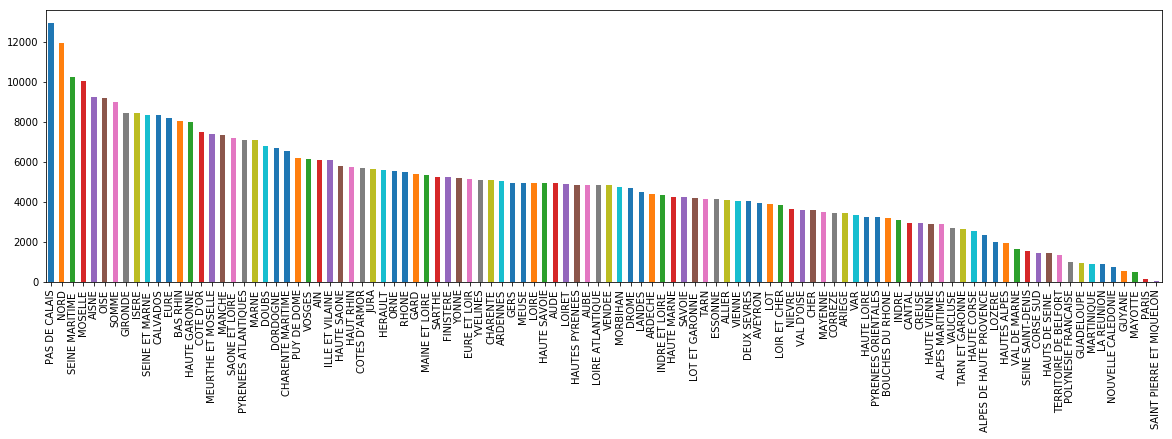

In [5]:
data['Libellé de département (Maires)'].value_counts().plot(kind='bar', figsize=(20,5))

In [6]:
data['Code sexe'].value_counts(normalize=True)

M    0.600824
F    0.399176
Name: Code sexe, dtype: float64

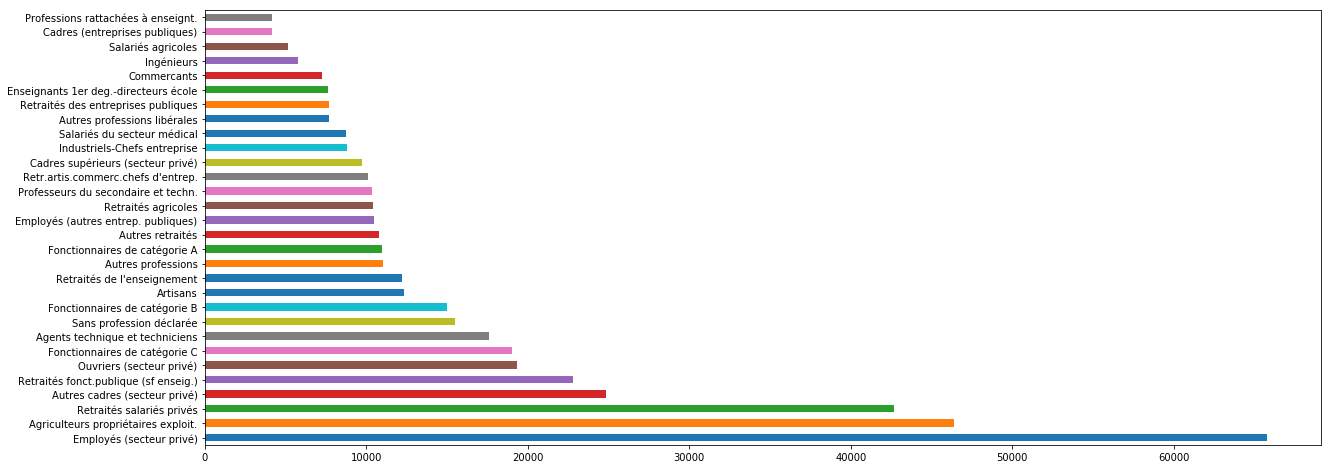

In [7]:
data['Libellé de la profession'].value_counts().head(30).plot(kind='barh', figsize=(20,8))

In [8]:
data["Nationalité de l'élu"].value_counts(normalize=True)

Française          0.994961
Britannique        0.001532
Belge              0.001094
Portugaise         0.000719
Néerlandaise       0.000638
Allemande          0.000422
Italienne          0.000255
Espagnole          0.000165
Irlandaise         0.000058
Polonaise          0.000020
Roumaine           0.000020
Suédoise           0.000020
Danoise            0.000018
Finlandaise        0.000016
Autrichienne       0.000016
Luxembourgeoise    0.000014
Grecque            0.000010
Tchèque            0.000006
Bulgare            0.000006
Hongroise          0.000006
Maltaise           0.000002
Croate             0.000002
Name: Nationalité de l'élu, dtype: float64

In [9]:
data['Date de naissance'].describe()

count       498195
unique       22775
top       1/1/1950
freq           108
Name: Date de naissance, dtype: object

In [10]:
data['Date de naissance clean'] = data['Date de naissance'].astype("datetime64")

In [11]:
data['Date de naissance clean'].describe()

count                  498195
unique                  22775
top       1950-01-01 00:00:00
freq                      108
first     1900-01-01 00:00:00
last      2000-09-07 00:00:00
Name: Date de naissance clean, dtype: object

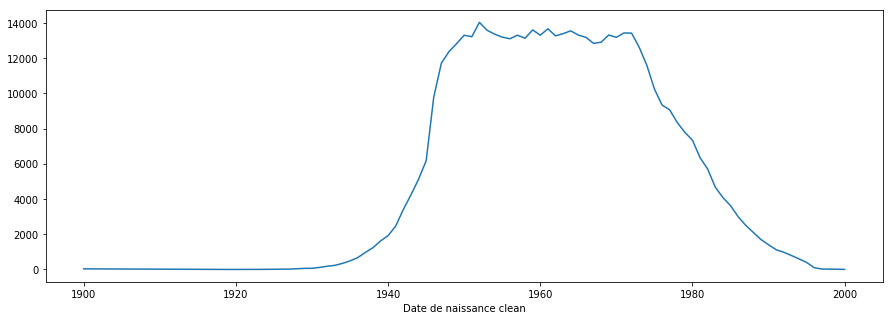

In [12]:
data.groupby(data['Date de naissance clean'].dt.year).count()['Code sexe'].plot(figsize=(15, 5))

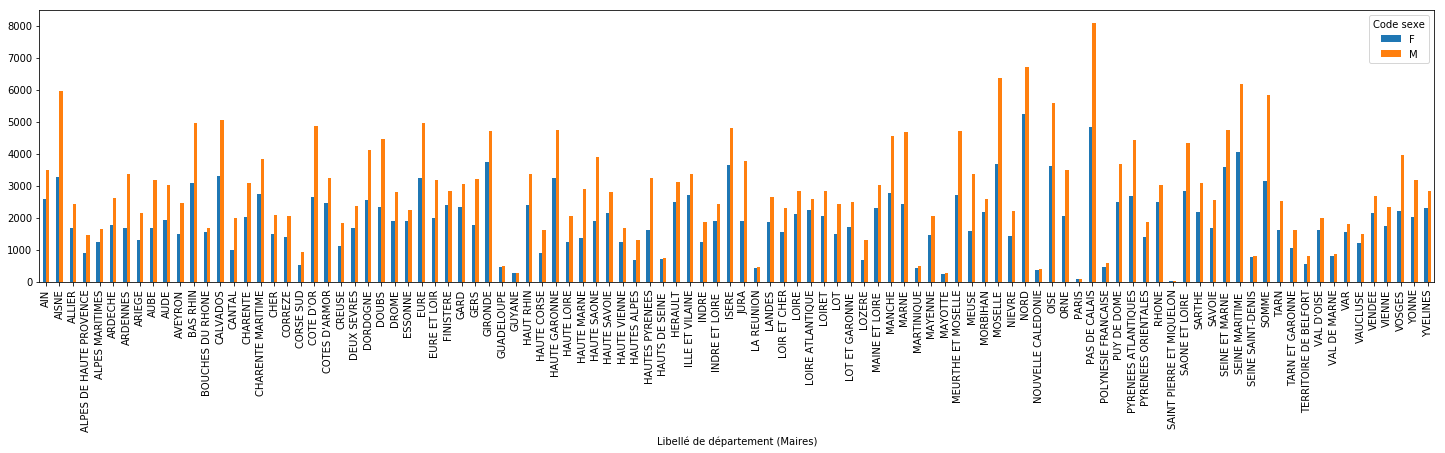

In [13]:
data.groupby(['Libellé de département (Maires)', 'Code sexe']).size().unstack().plot.bar(figsize=(25, 5))